In [156]:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import squarify
sns.set(style="whitegrid")
from pySankey import sankey
import plotly.graph_objects as go
#pd.set_option('display.float_format', '{:.2f}'.format)

In [26]:
df = pd.read_csv('dataTP1.csv')

In [27]:
df.columns

Index(['ID', 'Region', 'Territory', 'Pricing, Delivery_Terms_Quote_Appr',
       'Pricing, Delivery_Terms_Approved', 'Bureaucratic_Code_0_Approval',
       'Bureaucratic_Code_0_Approved', 'Submitted_for_Approval',
       'Bureaucratic_Code', 'Account_Created_Date', 'Source ',
       'Billing_Country', 'Account_Name', 'Opportunity_Name', 'Opportunity_ID',
       'Sales_Contract_No', 'Account_Owner', 'Opportunity_Owner',
       'Account_Type', 'Opportunity_Type', 'Quote_Type', 'Delivery_Terms',
       'Opportunity_Created_Date', 'Brand', 'Product_Type', 'Size',
       'Product_Category_B', 'Price', 'Currency', 'Last_Activity',
       'Quote_Expiry_Date', 'Last_Modified_Date', 'Last_Modified_By',
       'Product_Family', 'Product_Name', 'ASP_Currency', 'ASP',
       'ASP_(converted)_Currency', 'ASP_(converted)',
       'Planned_Delivery_Start_Date', 'Planned_Delivery_End_Date', 'Month',
       'Delivery_Quarter', 'Delivery_Year', 'Actual_Delivery_Date', 'TRF',
       'Total_Amount_Currenc

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16499 entries, 0 to 16498
Data columns (total 54 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   ID                                  16499 non-null  int64  
 1   Region                              16499 non-null  object 
 2   Territory                           16499 non-null  object 
 3   Pricing, Delivery_Terms_Quote_Appr  16499 non-null  int64  
 4   Pricing, Delivery_Terms_Approved    16499 non-null  int64  
 5   Bureaucratic_Code_0_Approval        16499 non-null  int64  
 6   Bureaucratic_Code_0_Approved        16499 non-null  int64  
 7   Submitted_for_Approval              16499 non-null  int64  
 8   Bureaucratic_Code                   16499 non-null  object 
 9   Account_Created_Date                16499 non-null  object 
 10  Source                              16499 non-null  object 
 11  Billing_Country                     16499

###### Ojo ID es el id del cada registro (osea de cada fila que es único por fila), que no es igual a Opportunity_ID (ID de la oportunidad), ya que puedo tener varios registros (filas) para una misma oportunidad.

In [29]:
df['Submitted_for_Approval'].value_counts()

0    16499
Name: Submitted_for_Approval, dtype: int64

In [30]:
df['Opportunity_Created_Date']=pd.to_datetime(df['Opportunity_Created_Date'])

In [31]:
df.head()

ID   Region   Territory  Pricing, Delivery_Terms_Quote_Appr  \
0  27761   Europa        None                                   1   
1  27760   Europa        None                                   0   
2  27446  América  NW America                                   0   
3  16808  América  NW America                                   1   
4  16805  América  NW America                                   1   

   Pricing, Delivery_Terms_Approved  Bureaucratic_Code_0_Approval  \
0                                 1                             1   
1                                 0                             0   
2                                 0                             0   
3                                 0                             1   
4                                 0                             1   

   Bureaucratic_Code_0_Approved  Submitted_for_Approval    Bureaucratic_Code  \
0                             1                       0  Bureaucratic_Code_4   
1                             0                       0  Bureaucratic_Code_4   
2                             0                       0  Bureaucratic_Code_4   
3                             0                       0  Bureaucratic_Code_5   
4                             0                       0  Bureaucratic_Code_5   

  Account_Created_Date  ... Actual_Delivery_Date TRF Total_Amount_Currency  \
0            6/16/2015  ...                  NaT  10                   EUR   
1            6/16/2015  ...                  NaT   0                   EUR   
2            4/21/2015  ...                  NaT   0                   USD   
3            7/27/2013  ...                  NaT  14                   USD   
4            7/27/2013  ...                  NaT  25                   USD   

  Total_Amount  Total_Taxable_Amount_Currency Total_Taxable_Amount  \
0    5272800.0                            EUR            5272800.0   
1      48230.0                            EUR              48230.0   
2      83865.6                            USD              83865.6   
3    7421881.5                            USD            7421881.5   
4   13357192.5                            USD           13357192.5   

         Stage       Prod_Category_A        Hemisferio Estación  
0  Closed Lost  Prod_Category_A_None              None      NaN  
1   Closed Won  Prod_Category_A_None              None      NaN  
2   Closed Won  Prod_Category_A_None  Hemisferio Norte    Otoño  
3  Closed Lost  Prod_Category_A_None  Hemisferio Norte    Otoño  
4  Closed Lost  Prod_Category_A_None  Hemisferio Norte    Otoño  

[5 rows x 54 columns]

In [32]:
len(set(df.Opportunity_Name))

9841

In [33]:
df_op =df.drop_duplicates(subset='Opportunity_Name',keep='first')

In [34]:
df_op[['ID','Opportunity_ID','Opportunity_Name','Region','Territory']]

ID  Opportunity_ID        Opportunity_Name   Region   Territory
0      27761               0  Opportunity_Name_12598   Europa        None
1      27760               1  Opportunity_Name_12600   Europa        None
2      27446               2    Opportunity_Name_469  América  NW America
3      16808               3    Opportunity_Name_415  América  NW America
4      16805               4    Opportunity_Name_851  América  NW America
...      ...             ...                     ...      ...         ...
16491  18324           12799   Opportunity_Name_7202   Europa      Norway
16492  20827           12800  Opportunity_Name_11979  América  NE America
16494   8781           12801   Opportunity_Name_9245   Europa     Austria
16497  28561           12802   Opportunity_Name_5843  América  NE America
16498  28318           12803   Opportunity_Name_9911  América  NE America

[9841 rows x 5 columns]

## 1. Stage

* #### Stage es nuestra variable target, variable que nos indica el estado de la oportunidad, o sea si la oportunidad resultó en éxito o no (closed won o closed lost respectivamente).

In [35]:
# Veamos sus valores únicos y cantidades
df_op['Stage'].value_counts()

Closed Won       5072
Closed Lost      4719
Proposal           30
Negotiation        11
Qualification       9
Name: Stage, dtype: int64

* Se observa en dicha variable que, además de los estados que indican si una oportunidad resultó exitosa o no (**estados finales**), tenemos otros 3 estados (Proposal, Negotiation y Qualification) que corresponden a **estados intermedios** que tienen las oportunidades dentro del pipeline que desarrolla la empresa.

* Como con esta variable se estará luego tratando de predecir la “Probabilidad de éxito” para cada oportunidad, o sea ¿Cuál es la probabilidad de que la oportunidad se convierta en un caso Closed Won? .Que decisión debemos tomar con dichos estados? Dichos estados al no tener una resolución, debemos asignarle arbitrariamente algún estado final? Debemos filtrar estos casos?

> Luego de analizar esos registros con estos estados intermedios y verificar que corresponen a oportunidades que no tuvieron aún en desenlase exitoso o no y tenindo en cuenta que corresponden a unos pocos casos, tomamos la decisión de filtrar estos registros y quedarnos solamente con los que tienen un estado final definido.

In [36]:
df_op = df_op.loc[(df_op['Stage']!='Proposal') & (df_op['Stage']!='Negotiation') & (df_op['Stage']!='Qualification'),:]

#### En nuestro set de datos: ¿Cuántas oportunidades resultaron exitosas y cuantas no lo fueron?

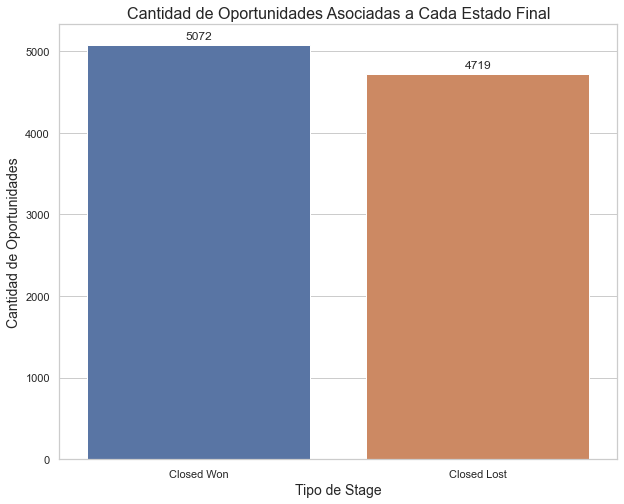

In [37]:
target = df_op['Stage'].value_counts()
plt.subplots(figsize=(10,8))
grafico_top7=sns.barplot(y=target.values,x=target.index,orient='v')
for p in grafico_top7.patches:
    grafico_top7.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
grafico_top7.set_title("Cantidad de Oportunidades Asociadas a Cada Estado Final",fontsize=16)
grafico_top7.set_ylabel("Cantidad de Oportunidades",fontsize=14)
grafico_top7.set_xlabel("Tipo de Stage",fontsize=14);
plt.savefig('5.png')

In [38]:
df_op['Stage'].value_counts(normalize=True)

Closed Won     0.518027
Closed Lost    0.481973
Name: Stage, dtype: float64

* Se observa que en nuestro set de datos predominan las Oportunidades que resultaron Exitosas, con 9300 casos (57%) frente a las No Exitosas con 7135 casos (43%)

## 2. Región:

#### ¿Cuántas rigiones distintas tenemos en nuestro set de datos y como se distribuyen las cantidasdes de Oportunidades en las mismas?

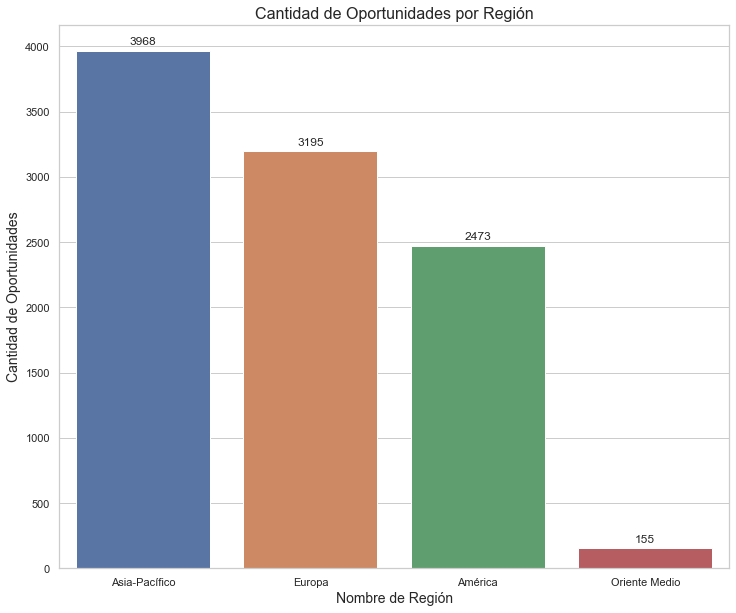

In [39]:
target = df_op['Region'].value_counts()
plt.subplots(figsize=(12,10))
grafico=sns.barplot(y=target.values,x=target.index,orient='v')
for p in grafico.patches:
    grafico.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
grafico.set_title("Cantidad de Oportunidades por Región",fontsize=16)
grafico.set_ylabel("Cantidad de Oportunidades",fontsize=14)
grafico.set_xlabel("Nombre de Región",fontsize=14);

* La Región Asia-Pacífico es la predominante con 7726 oportunidades, es importante destacar que el valor alcanzado por esta Región, mucho tiene que ver con lo realizado en el Preprocesamiento de los datos. A ésta Región le asignamos a Japón como territorio perteneciente. Este dato no es menor ya que Japón representa el 63% del total de oportunidades de la Región Asia-Pacífico y un 30% del Total de oportunidades globales. Las Regiones que le siguen son Europa y América en cantidad de oportunidades con valores no tan dispares, 4592 y 3930 respectivamente. Finalmente Oriente Medio es la Región que presenta menos oportunidades para la empresa con solamnete 187.

In [40]:
df_op.loc[df['Region']=='Asia-Pacífico',:]['Territory'].value_counts(normalize=True).head()

Japan        0.475050
India        0.170867
Australia    0.145413
Singapore    0.073841
Thailand     0.037046
Name: Territory, dtype: float64

In [41]:
df_op['Territory'].value_counts(normalize=True).head()

Japan         0.192524
Germany       0.110305
NW America    0.089266
India         0.069247
Australia     0.058932
Name: Territory, dtype: float64

#### ¿Cómo se distribuyen las oportunidades exitosas y no exitosas según las distintas Regiones?

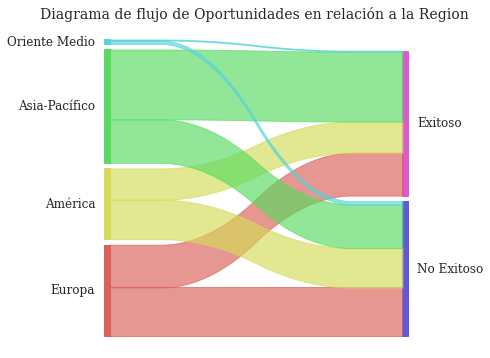

In [42]:
df_op['Oportunidad']= '' 
df_op.loc[df_op['Stage']== 'Closed Won','Oportunidad']= 'Exitoso'
df_op.loc[df_op['Stage']== 'Closed Lost','Oportunidad']= 'No Exitoso'
sankey.sankey(df_op['Region'],df_op['Oportunidad'],aspect=20, fontsize=12)
plt.title('Diagrama de flujo de Oportunidades en relación a la Region ',fontsize=14);

* Asia-Pacífico, que como vimos es la Región que más oportunidades presenta y también es la que mayor casos Exitosos tiene como era de esperar, pero notamos que su flujo hacia los casos Exitosos es mayor que a los No Exitosos, mientras que las demás Regiones a simple vista presentan una distribución bastante similar hacia casos Exitosos y No Exitosos.

#### Si quiero cuantificar esas distribuciones de Oportunidades en Exitosas o No Exitosas según cada Región. ¿Cuáles son esas cantidades?

In [43]:
df_op['veces'] = 1
mi_map=pd.crosstab(df_op['Region'], df_op['Stage'],values=df_op.veces,aggfunc=np.sum)

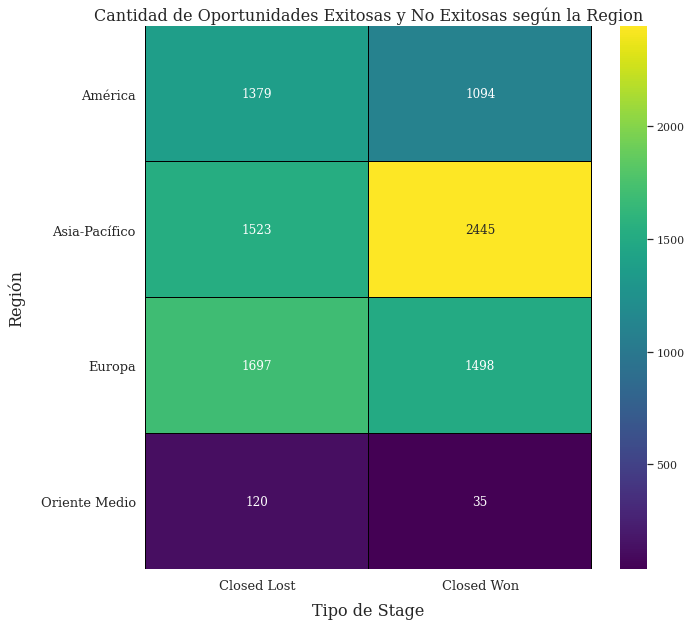

In [44]:
fig, ax = plt.subplots(figsize=(10,10))
g = sns.heatmap(mi_map, cmap="viridis", ax=ax, linewidths=0.005, linecolor='black',annot=True,fmt='g')
g.set_title("Cantidad de Oportunidades Exitosas y No Exitosas según la Region", fontsize=16)
g.set_xlabel("Tipo de Stage", fontsize=16, labelpad=10)
g.set_ylabel("Región", fontsize=16, labelpad=16, rotation=90)
g.set_xticklabels(g.get_xticklabels(), fontsize=13)
g.set_yticklabels(g.get_yticklabels(), fontsize=13, rotation=0)
g.title.set_position([0.5, 1.05])
plt.show()

* Al cuantificar los valores de casos Exitosos y No Exitosos asociados a cada Región podemos ver varias cosas interesantes. Para Asia-Pacífico, no solo las cantidades exitosas son mayores a las no exitosas sinó que representan una alta cantidad del total de oportunidades de dicha Región,más precisamente un 65%. Europa también presenta mayor cantidad de oportunidades exitosas en relación su total de oportunidades (2463 casos exitosos frente a 2129 no exitosos) un 54% aproximadamente. Para las dos Regiones restantes (América y Oriente Medio) los casos no exitosos son los que predominan en el total de oportunidades de dichas regiones.

#### ¿Cómo es la evolución anual de la cantidad de Oportunidades según la Región?

In [45]:
df_op['Año_Oportunidad']=df_op['Opportunity_Created_Date'].dt.year

In [46]:
df_op['Opportunity_Created_Date'].nlargest(3)

15653   2018-12-29
15652   2018-12-28
15651   2018-12-26
Name: Opportunity_Created_Date, dtype: datetime64[ns]

In [47]:
df_op['Opportunity_Created_Date'].nsmallest(3)

15656   2013-11-05
15657   2014-03-21
15658   2014-03-28
Name: Opportunity_Created_Date, dtype: datetime64[ns]

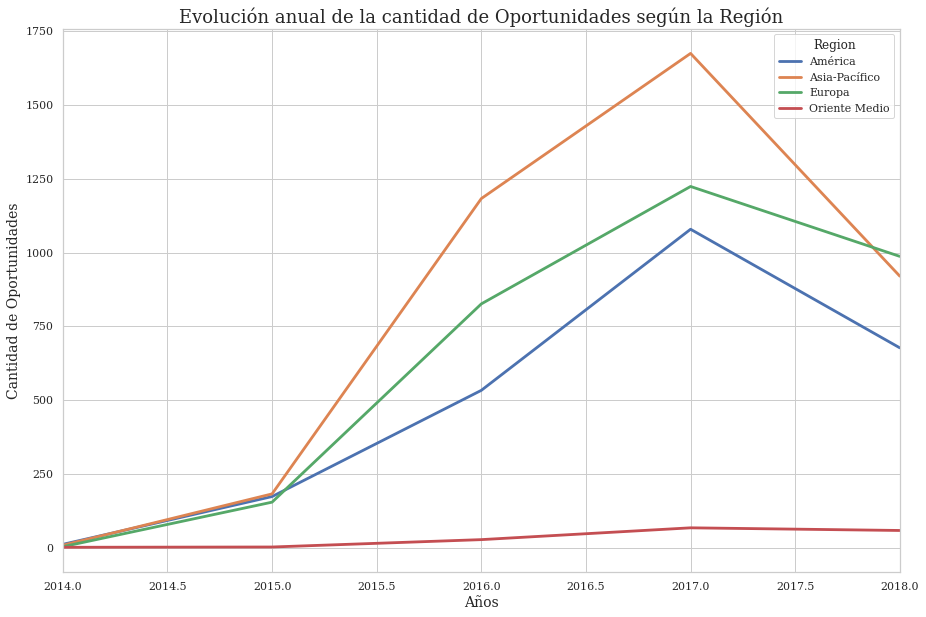

In [48]:
grafico=pd.crosstab(df_op['Año_Oportunidad'],df_op['Region']).plot(figsize=(15,10),linewidth=2.8);
grafico.set_title("Evolución anual de la cantidad de Oportunidades según la Región",fontsize=18)
plt.xlim(2014,2018)
grafico.set_xlabel("Años",fontsize=14)
grafico.set_ylabel("Cantidad de Oportunidades",fontsize=14);

* Oriente Medio en general presenta un comportamiento prácticamente constante con muy bajas cantidades de oportunidades, las cuales tuvieron un tenue incremento entre 2016 y 2017.

* Las regiones América, Europa y Asia-Pacífico de 2014 a 2015 notamos que presentan un incremento en cantidad de oportunidades. Asia-Pacífico presenta un más marcado incremento (mayor pendiente) que las dos primeras. América y Europa en este período tienen una pendiete similar, con la primera Región levemente por encima de la segunda. 

* Asia-Pacífico continúa con el crecimiento en cantidad de oportunidades de 2015 a 2017 siendo más notorio su incremento en el príodo 2015-2016 que en 2016-2017. Luego de 2017 a 2018 ocurre una brusca caída, terminando con cantidades cercanas a Europa.

* América y Europa también continúan con el crecimiento en cantidad de oportunidades de 2015 a 2017 pero ésta última supera a la primera antes de la mitad del 2015 con una pendiente positiva constante hasta el 2017. América por su lado de 2015 a 2016 tuvo una menor pendiente positiva pero de 2016 a 2017 muestra una mayor recuperación. Luego, de 2017 al 2018 ambas Regiones presentan pendiente negativas denotando caídas en las oportunidades, aunque no tan bruscas como Asia-Pacífico.

## 3. Hemisferio

#### ¿Cómo se distribuyen las oportunidades exitosas y no exitosas según los distintas Hemisferios?

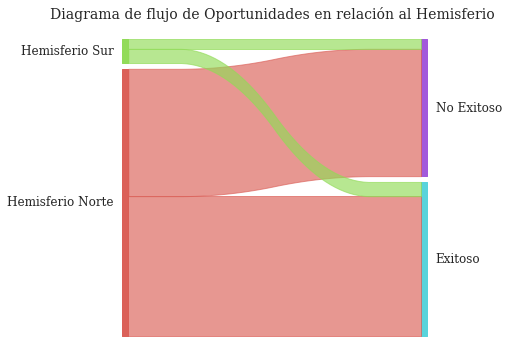

In [120]:
# Filtro primeramente los valores correspondiente a los 2 Hemisferios con los que cuento información(filtro casos nulos)
hemisferios = df_op.loc[df_op['Hemisferio']!='None',:].copy()
sankey.sankey(hemisferios['Hemisferio'],hemisferios['Oportunidad'],aspect=20, fontsize=12)
plt.title('Diagrama de flujo de Oportunidades en relación al Hemisferio ',fontsize=14);

* (Analizar)

#### Si quiero cuantificar esas distribuciones de Oportunidades en Exitosas o No Exitosas según cada Hemisferio. ¿Cuáles son esas cantidades?

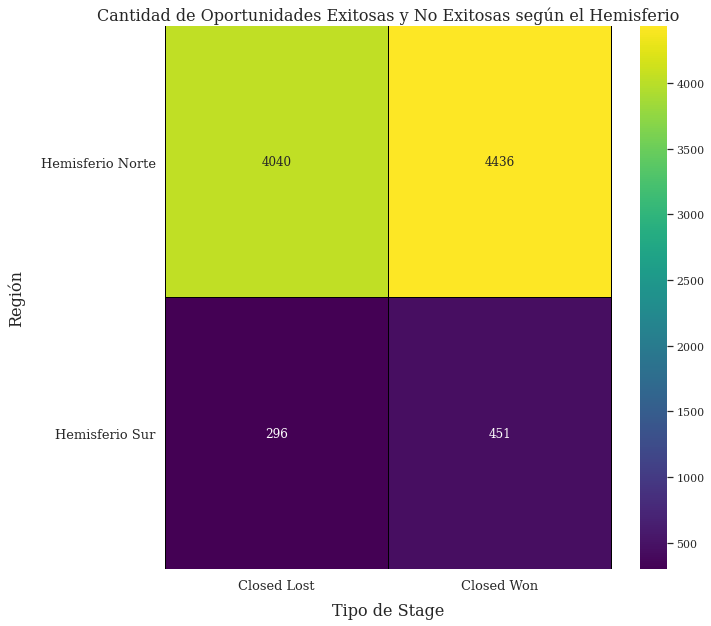

In [56]:
hemisferios['veces'] = 1
mi_map=pd.crosstab(hemisferios['Hemisferio'], hemisferios['Stage'],values=hemisferios.veces,aggfunc=np.sum)

fig, ax = plt.subplots(figsize=(10,10))
g = sns.heatmap(mi_map, cmap="viridis", ax=ax, linewidths=0.005, linecolor='black',annot=True,fmt='g')
g.set_title("Cantidad de Oportunidades Exitosas y No Exitosas según el Hemisferio", fontsize=16)
g.set_xlabel("Tipo de Stage", fontsize=16, labelpad=10)
g.set_ylabel("Región", fontsize=16, labelpad=16, rotation=90)
g.set_xticklabels(g.get_xticklabels(), fontsize=13)
g.set_yticklabels(g.get_yticklabels(), fontsize=13, rotation=0)
g.title.set_position([0.5, 1.05])
plt.show()

* (Analizar)

## 4. Territorios

#### ¿Cuáles son los 7 Territorios más populares para cada Región?

In [57]:
df_territorio=df_op[['Territory','Stage','Region']].copy()
df_territorio['veces'] = 1
df_territorio = df_territorio.loc[df_territorio['Territory']!='None',:]
america = df_territorio.loc[df_territorio['Region']=='América',['Territory']]
europa = df_territorio.loc[df_territorio['Region']=='Europa',['Territory']]
oriente_medio = df_territorio.loc[df_territorio['Region']=='Oriente Medio',['Territory']]
asia_pacifico = df_territorio.loc[df_territorio['Region']=='Asia-Pacífico',['Territory']]

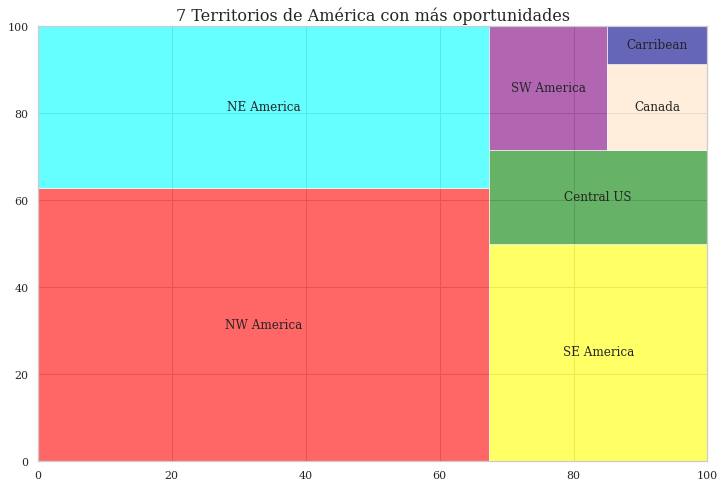

In [58]:
territorios = america['Territory'].value_counts()
data = territorios.head(7)
fig = plt.gcf()
ax = fig.add_subplot()
fig.set_size_inches(12, 8)
visu = squarify.plot(data, label=data.index, alpha=.6,color=['red','cyan','yellow','green','purple','bisque','darkblue'],)
visu.set_title('7 Territorios de América con más oportunidades',fontsize=16);

* (Analizar)

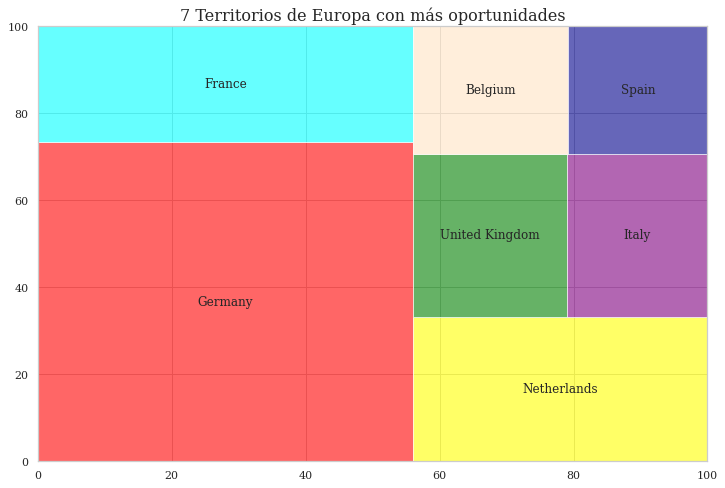

In [59]:
territorios = europa['Territory'].value_counts()
data = territorios.head(7)
fig = plt.gcf()
ax = fig.add_subplot()
fig.set_size_inches(12, 8)
visu = squarify.plot(data, label=data.index, alpha=.6,color=['red','cyan','yellow','green','purple','bisque','darkblue'],)
visu.set_title('7 Territorios de Europa con más oportunidades',fontsize=16);

* (Analizar)

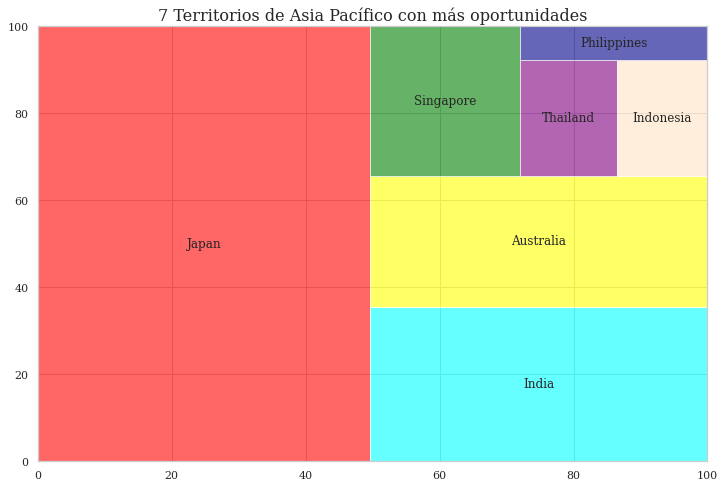

In [60]:
territorios = asia_pacifico['Territory'].value_counts()
data = territorios.head(7)
fig = plt.gcf()
ax = fig.add_subplot()
fig.set_size_inches(12, 8)
visu = squarify.plot(data, label=data.index, alpha=.6,color=['red','cyan','yellow','green','purple','bisque','darkblue'],)
visu.set_title('7 Territorios de Asia Pacífico con más oportunidades',fontsize=16);

* (Analizar)

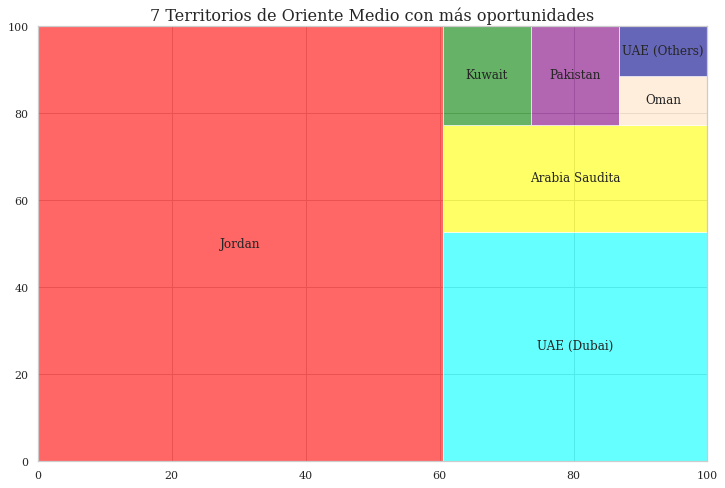

In [61]:
territorios = oriente_medio['Territory'].value_counts()
data = territorios.head(7)
fig = plt.gcf()
ax = fig.add_subplot()
fig.set_size_inches(12, 8)
visu = squarify.plot(data, label=data.index, alpha=.6,color=['red','cyan','yellow','green','purple','bisque','darkblue'],)
visu.set_title('7 Territorios de Oriente Medio con más oportunidades',fontsize=16);

* (Analizar)

#### Independientemente de la Región. ¿Cuál es el Top 7 Territorios más populares y sus correspondientes cantidades de Oportunidades?

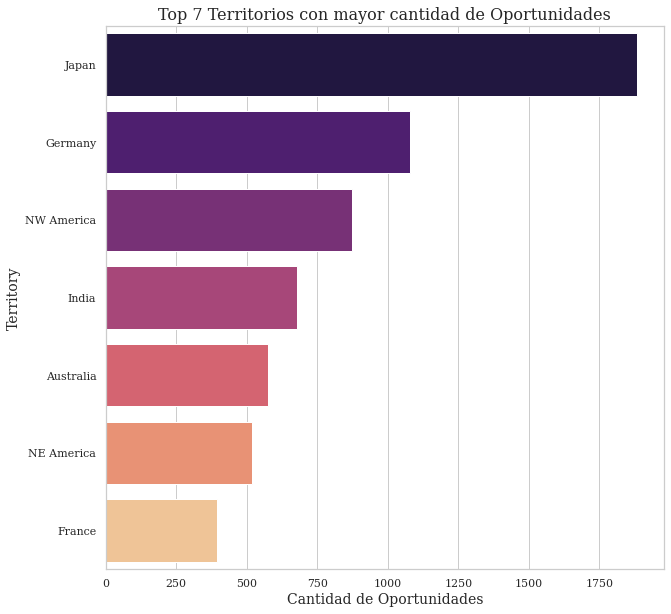

In [62]:
target = df_territorio['Territory'].value_counts().nlargest(7)
plt.subplots(figsize=(10,10))
grafico_top_key=sns.barplot(x=target.values,y=target.index,palette="magma")
grafico_top_key.set_title("Top 7 Territorios con mayor cantidad de Oportunidades",fontsize=16)
grafico_top_key.set_xlabel("Cantidad de Oportunidades",fontsize=14)
grafico_top_key.set_ylabel("Territory",fontsize=14);

* (Analizar)

#### Para los 7 Territorios con mayor cantidad de Oportunidades. ¿Cuantas de ellas son Exitosas y No Exitosas?

In [63]:
 mis_territorios = pd.pivot_table(df_territorio, values='veces', index=['Territory'],columns=['Stage'], aggfunc=np.sum, fill_value=0).reset_index()

In [64]:
target = df_territorio['Territory'].value_counts().nlargest(7)
target= target.reset_index()
target.rename(columns={'index':'Territory','Territory':'Cantidad'},inplace=True)
target

Territory  Cantidad
0       Japan      1885
1     Germany      1080
2  NW America       874
3       India       678
4   Australia       577
5  NE America       518
6      France       393

In [65]:
top7_territorios = pd.merge(target,mis_territorios,on='Territory')
top7_territorios.set_index('Territory',inplace=True)
top7_territorios.drop('Cantidad',axis='columns', inplace=True)
top7_territorios

Closed Lost  Closed Won
Territory                          
Japan               595        1290
Germany             488         592
NW America          321         553
India               368         310
Australia           194         383
NE America          338         180
France              277         116

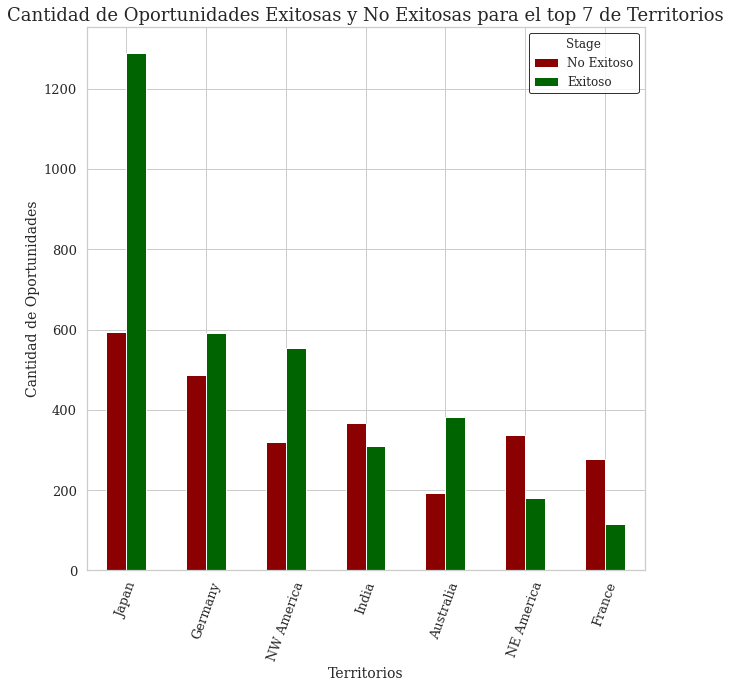

In [66]:
grafico=top7_territorios.plot(kind='bar',color=['darkred','darkgreen'],fontsize=13,figsize=(10,10),rot=70)
grafico.set_title("Cantidad de Oportunidades Exitosas y No Exitosas para el top 7 de Territorios",fontsize=18)
grafico.set_xlabel("Territorios",fontsize=14)
grafico.set_ylabel("Cantidad de Oportunidades",fontsize=14)
leyenda=plt.legend(['No Exitoso','Exitoso'],fontsize=12,title='Stage',frameon=True,facecolor='white',edgecolor='black')
leyenda.get_frame().set_linewidth(1.0)

* Es este gráfico se aprecia que, dentro del Tpo 7, solo los cuatro primeros Territorios con mayor cantidad de oportunidades presentan una mayor cantidad de casos Exitosos que no Exitosos. Destacandose Japón con una cantidad de casos Exitosos de más del doble que no Exitosos.

* Si prestamos atención un poco más al gráfico nos damos cuenta de que, si quisiéramos listar por ejemplo los tres países (en cantidad de Oportunidades) más exitosos, estos serían: Japan, Germany y NW América. Igualmente si quisiéramos listar Los tres países menos Exitosos (en cantidad de Oportunidades) nuevamente éstos serían: Japan, Germany y NW América. Esto pasa porque estamos analizando cantidades absolutas, con lo cual, para poder sacar mejores conclusiones sobre dichos Territorios sería más conveniente realizar un análisis proporcional (relativo) que contemple por ejemplo la cantidad de casos Exitosos sobre el total de casos para cada Territorio y luego sí listar esos 7 Territorios con mejor Ratio.

In [67]:
territorio_oprtunidades = pd.pivot_table(df_territorio, values='veces', index=['Territory'],columns=['Stage'], aggfunc=np.sum, fill_value=0).reset_index()
territorio_oprtunidades=territorio_oprtunidades.fillna(0)
territorio_oprtunidades['Total_Oportunidades'] = territorio_oprtunidades['Closed Lost']+ territorio_oprtunidades['Closed Won']
territorio_oprtunidades['Ratio_Oportunidades_exitosas'] = territorio_oprtunidades['Closed Won']/territorio_oprtunidades['Total_Oportunidades']
territorio_oprtunidades.head()

Stage       Territory  Closed Lost  Closed Won  Total_Oportunidades  \
0             Albania            2           0                    2   
1      Arabia Saudita            7           6                   13   
2             Armenia            1           0                    1   
3           Australia          194         383                  577   
4             Austria           14          58                   72   

Stage  Ratio_Oportunidades_exitosas  
0                          0.000000  
1                          0.461538  
2                          0.000000  
3                          0.663778  
4                          0.805556

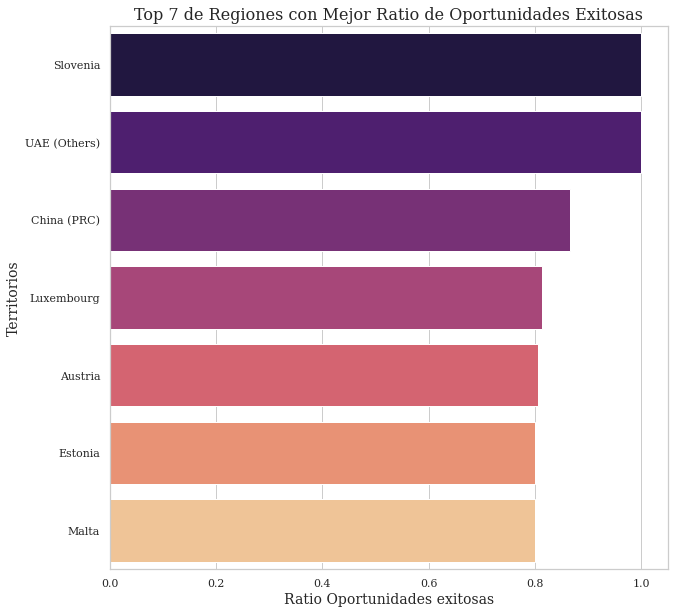

In [68]:
target = territorio_oprtunidades.nlargest(7,'Ratio_Oportunidades_exitosas')
plt.subplots(figsize=(10,10))
grafico_top_key=sns.barplot(x=target.Ratio_Oportunidades_exitosas,y=target.Territory,palette="magma")
grafico_top_key.set_title("Top 7 de Regiones con Mejor Ratio de Oportunidades Exitosas",fontsize=16)
grafico_top_key.set_xlabel("Ratio Oportunidades exitosas",fontsize=14)
grafico_top_key.set_ylabel("Territorios",fontsize=14);

* Además para que este análisis no caiga en el problema de la ecuación más paligrosa del mundo, debemos tomar ciertas restricciones, como por ejemplo que en ese Top 7 de mejores Ratios tengamos Territorios con una cantidad de Oportunidades mayor al 1,5% del Total de Oportunidades que presenta la empresa.

In [69]:
territorio_oprtunidades.Total_Oportunidades.sum()*0.015

138.345

* Ahora  filtramos los casos bajo las restricciones pedidas

In [70]:
territorio_oprtunidades=territorio_oprtunidades.loc[territorio_oprtunidades['Total_Oportunidades']>139]

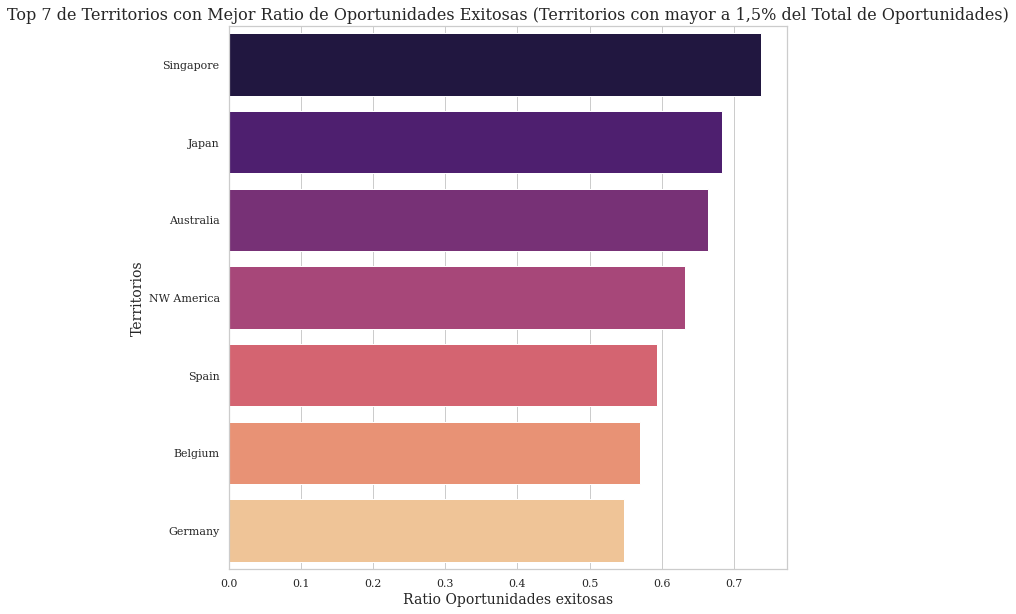

In [71]:
target = territorio_oprtunidades.nlargest(7,'Ratio_Oportunidades_exitosas')
plt.subplots(figsize=(10,10))
grafico_top_key=sns.barplot(x=target.Ratio_Oportunidades_exitosas,y=target.Territory,palette="magma")
grafico_top_key.set_title("Top 7 de Territorios con Mejor Ratio de Oportunidades Exitosas (Territorios con mayor a 1,5% del Total de Oportunidades)",fontsize=16)
grafico_top_key.set_xlabel("Ratio Oportunidades exitosas",fontsize=14)
grafico_top_key.set_ylabel("Territorios",fontsize=14);

* (Analizar)

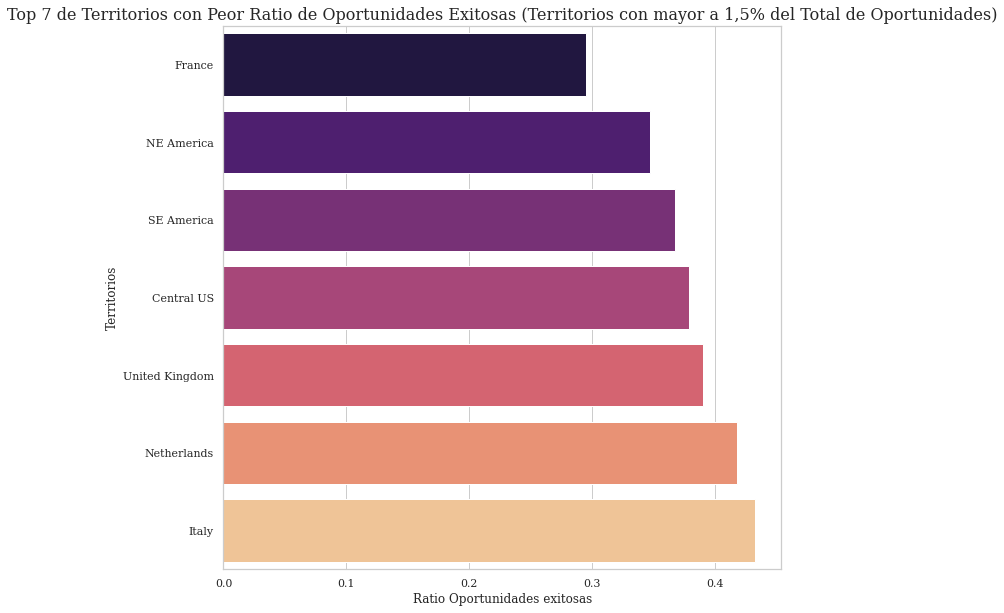

In [72]:
target = territorio_oprtunidades.nsmallest(7,'Ratio_Oportunidades_exitosas')
plt.subplots(figsize=(10,10))
grafico_top_key=sns.barplot(x=target.Ratio_Oportunidades_exitosas,y=target.Territory,palette="magma")
grafico_top_key.set_title("Top 7 de Territorios con Peor Ratio de Oportunidades Exitosas (Territorios con mayor a 1,5% del Total de Oportunidades)",fontsize=16)
grafico_top_key.set_xlabel("Ratio Oportunidades exitosas",fontsize=12)
grafico_top_key.set_ylabel("Territorios",fontsize=12);

* (Analizar)

#### Los 7 Territorios con mejor Ratio, como fue su evolución anual?

* Los 7 Territorios con mejor Ratio y su evolución en cantidad de Oportunidades

In [73]:
target = territorio_oprtunidades.nlargest(7,'Ratio_Oportunidades_exitosas')
#target= target.reset_index()
#target.rename(columns={'index':'Territory','Territory':'Cantidad'},inplace=True)
target

Stage   Territory  Closed Lost  Closed Won  Total_Oportunidades  \
55      Singapore           77         216                  293   
31          Japan          595        1290                 1885   
3       Australia          194         383                  577   
43     NW America          321         553                  874   
61          Spain           65          95                  160   
6         Belgium           77         102                  179   
24        Germany          488         592                 1080   

Stage  Ratio_Oportunidades_exitosas  
55                         0.737201  
31                         0.684350  
3                          0.663778  
43                         0.632723  
61                         0.593750  
6                          0.569832  
24                         0.548148

In [74]:
territorio_year = df_op[['Territory','Año_Oportunidad','Stage']]

In [75]:
top7_territorios=pd.merge(target,territorio_year,on='Territory',how='inner')
top7_territorios['veces']=1

In [76]:
pd.pivot_table(top7_territorios, values='veces', index=['Año_Oportunidad']\
               ,columns=['Territory'], aggfunc=np.sum, fill_value=0)

Territory        Australia  Belgium  Germany  Japan  NW America  Singapore  \
Año_Oportunidad                                                              
2014                     0        0        1      0           6          0   
2015                     8        1       26    126          79          2   
2016                   131       30      195    646         171         70   
2017                   359       89      428    714         350        112   
2018                    79       59      430    399         268        109   

Territory        Spain  
Año_Oportunidad         
2014                 0  
2015                 6  
2016                41  
2017                75  
2018                38

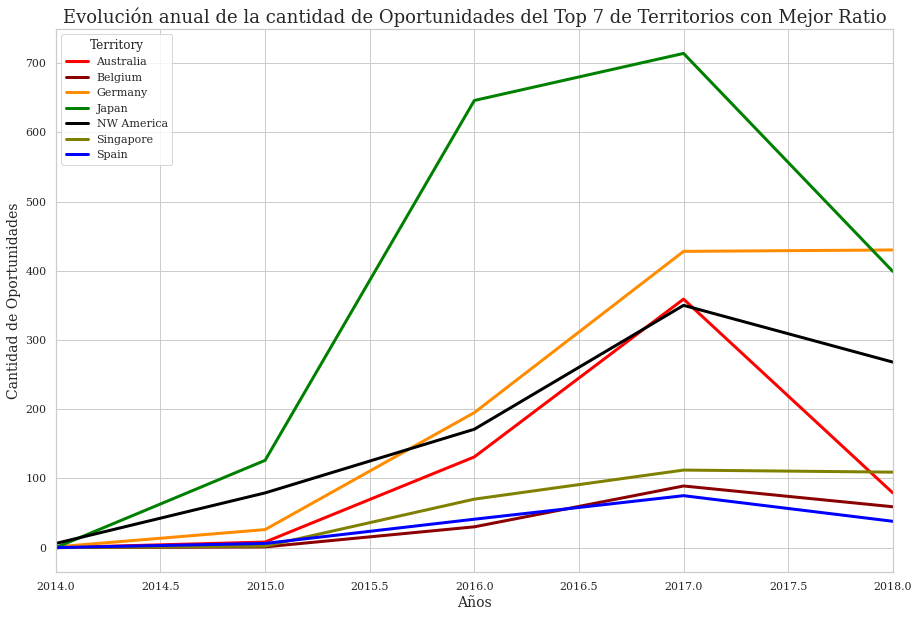

In [78]:
grafico=pd.pivot_table(top7_territorios, values='veces', index=['Año_Oportunidad']\
               ,columns=['Territory'], aggfunc=np.sum, fill_value=0).plot(figsize=(15,10),\
                color=['red','darkred','darkorange','green','black','olive','blue'],linewidth=3);
grafico.set_title("Evolución anual de la cantidad de Oportunidades del Top 7 de Territorios con Mejor Ratio",fontsize=18)
plt.xlim(2014,2018)
grafico.set_xlabel("Años",fontsize=14)
grafico.set_ylabel("Cantidad de Oportunidades",fontsize=14);

* (Analizar)

* Los 7 Territorios con mejor Ratio y la evolución temporal de su ratio.

In [79]:
top7_territorios_year=pd.pivot_table(top7_territorios, values='veces', index=['Año_Oportunidad','Territory']\
               ,columns=['Stage'], aggfunc=np.sum, fill_value=0)

In [80]:
top7_territorios_year['Total_Oportunidades']=top7_territorios_year['Closed Lost'] + top7_territorios_year['Closed Won']
top7_territorios_year['Ratio_Oportunidades_exitosas'] = top7_territorios_year['Closed Won']/top7_territorios_year['Total_Oportunidades']
top7_territorios_year

Stage                       Closed Lost  Closed Won  Total_Oportunidades  \
Año_Oportunidad Territory                                                  
2014            Germany               0           1                    1   
                NW America            3           3                    6   
2015            Australia             7           1                    8   
                Belgium               1           0                    1   
                Germany              18           8                   26   
                Japan                77          49                  126   
                NW America           65          14                   79   
                Singapore             2           0                    2   
                Spain                 5           1                    6   
2016            Australia            29         102                  131   
                Belgium              14          16                   30   
                Germany             100          95                  195   
                Japan               286         360                  646   
                NW America           74          97                  171   
                Singapore            34          36                   70   
                Spain                16          25                   41   
2017            Australia           114         245                  359   
                Belgium              38          51                   89   
                Germany             175         253                  428   
                Japan               149         565                  714   
                NW America          122         228                  350   
                Singapore            29          83                  112   
                Spain                25          50                   75   
2018            Australia            44          35                   79   
                Belgium              24          35                   59   
                Germany             195         235                  430   
                Japan                83         316                  399   
                NW America           57         211                  268   
                Singapore            12          97                  109   
                Spain                19          19                   38   

Stage                       Ratio_Oportunidades_exitosas  
Año_Oportunidad Territory                                 
2014            Germany                         1.000000  
                NW America                      0.500000  
2015            Australia                       0.125000  
                Belgium                         0.000000  
                Germany                         0.307692  
                Japan                           0.388889  
                NW America                      0.177215  
                Singapore                       0.000000  
                Spain                           0.166667  
2016            Australia                       0.778626  
                Belgium                         0.533333  
                Germany                         0.487179  
                Japan                           0.557276  
                NW America                      0.567251  
                Singapore                       0.514286  
                Spain                           0.609756  
2017            Australia                       0.682451  
                Belgium                         0.573034  
                Germany                         0.591121  
                Japan                           0.791317  
                NW America                      0.651429  
                Singapore                       0.741071  
                Spain                           0.666667  
2018            Australia                       0.443038  
                Belgium          

In [81]:
top7_territorios_year = top7_territorios_year.reset_index()
top7_territorios_year.tail(12)

Stage  Año_Oportunidad   Territory  Closed Lost  Closed Won  \
18                2017     Germany          175         253   
19                2017       Japan          149         565   
20                2017  NW America          122         228   
21                2017   Singapore           29          83   
22                2017       Spain           25          50   
23                2018   Australia           44          35   
24                2018     Belgium           24          35   
25                2018     Germany          195         235   
26                2018       Japan           83         316   
27                2018  NW America           57         211   
28                2018   Singapore           12          97   
29                2018       Spain           19          19   

Stage  Total_Oportunidades  Ratio_Oportunidades_exitosas  
18                     428                      0.591121  
19                     714                      0.791317  
20                     350                      0.651429  
21                     112                      0.741071  
22                      75                      0.666667  
23                      79                      0.443038  
24                      59                      0.593220  
25                     430                      0.546512  
26                     399                      0.791980  
27                     268                      0.787313  
28                     109                      0.889908  
29                      38                      0.500000

In [82]:
pd.pivot_table(top7_territorios_year, values='Ratio_Oportunidades_exitosas', index=['Año_Oportunidad']\
               ,columns=['Territory'], aggfunc=np.sum, fill_value=0)

Territory        Australia   Belgium   Germany     Japan  NW America  \
Año_Oportunidad                                                        
2014              0.000000  0.000000  1.000000  0.000000    0.500000   
2015              0.125000  0.000000  0.307692  0.388889    0.177215   
2016              0.778626  0.533333  0.487179  0.557276    0.567251   
2017              0.682451  0.573034  0.591121  0.791317    0.651429   
2018              0.443038  0.593220  0.546512  0.791980    0.787313   

Territory        Singapore     Spain  
Año_Oportunidad                       
2014              0.000000  0.000000  
2015              0.000000  0.166667  
2016              0.514286  0.609756  
2017              0.741071  0.666667  
2018              0.889908  0.500000

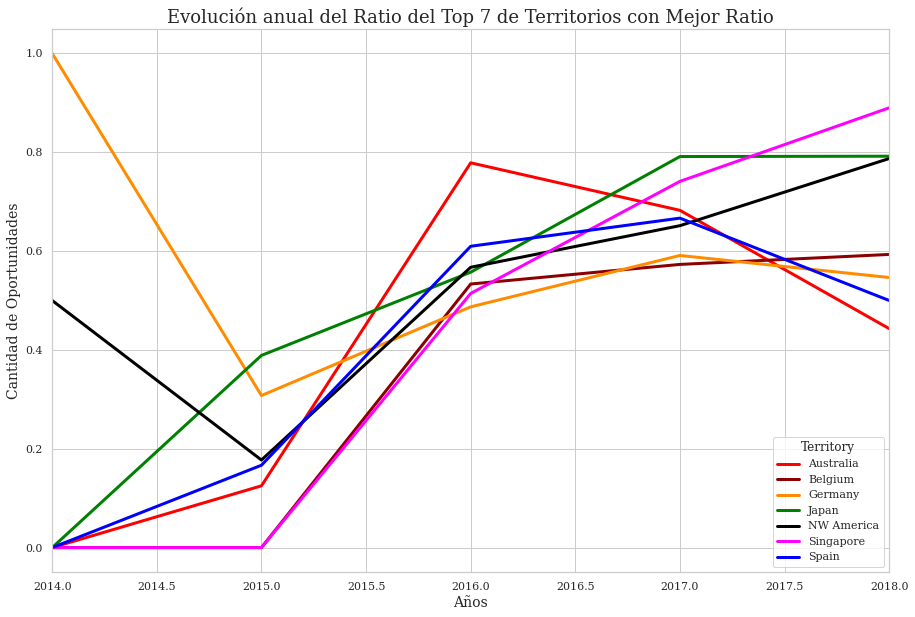

In [83]:
grafico=pd.pivot_table(top7_territorios_year, values='Ratio_Oportunidades_exitosas', index=['Año_Oportunidad']\
               ,columns=['Territory'], aggfunc=np.sum, fill_value=0).plot(figsize=(15,10),\
                color=['red','darkred','darkorange','green','black','magenta','blue'],linewidth=3);
grafico.set_title("Evolución anual del Ratio del Top 7 de Territorios con Mejor Ratio",fontsize=18)
plt.xlim(2014,2018,1)
grafico.set_xlabel("Años",fontsize=14)
grafico.set_ylabel("Cantidad de Oportunidades",fontsize=14);

* (Analizar)

* Analizar grupo de Territorios por tramos de años

* Acá puedo analizar a los territorios en general y luego ver la influecia de los territorios en las regiones en función de casos exitosos y no exitosos. Luego analizar caso Japón

## 5. Estaciones del año

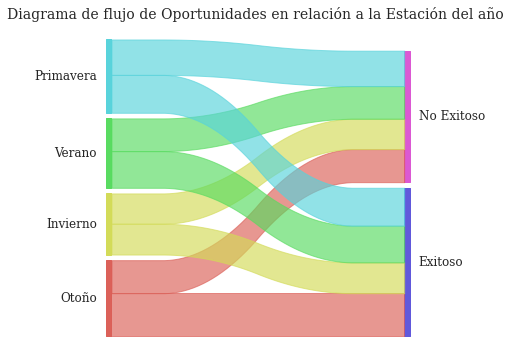

In [130]:
# Filtro primeramente los valores correspondiente a los 2 Hemisferios con los que cuento información(filtro casos nulos)
est = df_op.loc[(df_op['Estación']!='None') & (df_op['Estación'].notnull()),:].copy()
sankey.sankey(est['Estación'],est['Oportunidad'],aspect=20, fontsize=12)
plt.title('Diagrama de flujo de Oportunidades en relación a la Estación del año ',fontsize=14);

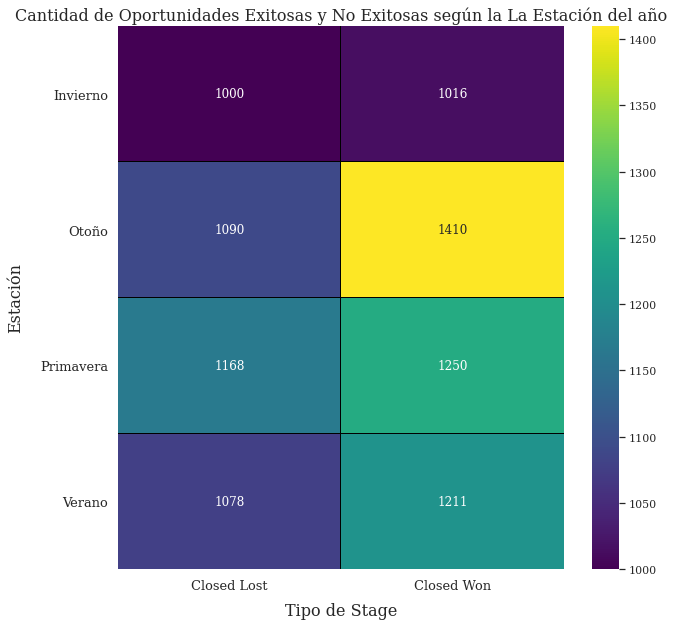

In [154]:
est['veces'] = 1
mi_map=pd.crosstab(est['Estación'], est['Stage'],values=est.veces,aggfunc=np.sum)
fig, ax = plt.subplots(figsize=(10,10))
g = sns.heatmap(mi_map, cmap="viridis", ax=ax, linewidths=0.005, linecolor='black',annot=True,fmt='g')
g.set_title("Cantidad de Oportunidades Exitosas y No Exitosas según la La Estación del año", fontsize=16)
g.set_xlabel("Tipo de Stage", fontsize=16, labelpad=10)
g.set_ylabel("Estación", fontsize=16, labelpad=16, rotation=90)
g.set_xticklabels(g.get_xticklabels(), fontsize=13)
g.set_yticklabels(g.get_yticklabels(), fontsize=13, rotation=0)
g.title.set_position([0.5, 1.05])
plt.show()

## 6. Toneladas de Refrigeración

In [143]:
mi_df=df.groupby(['Opportunity_ID','Region','Estación','Stage'], as_index=False)['TRF'].count()[['Opportunity_ID','Region','Estación','Stage']]
mi_df_trf=df.groupby(['Opportunity_ID'], as_index=False)['TRF'].sum()

In [144]:
mi_df_trf.head()

Opportunity_ID  TRF
0               0   10
1               1    0
2               2    0
3               3   14
4               4   25

In [145]:
# Si no pongo el +1 caigo en casos de calcular log(0)
mi_df_trf["TRF_log"] = np.log(mi_df_trf["TRF"]+1)

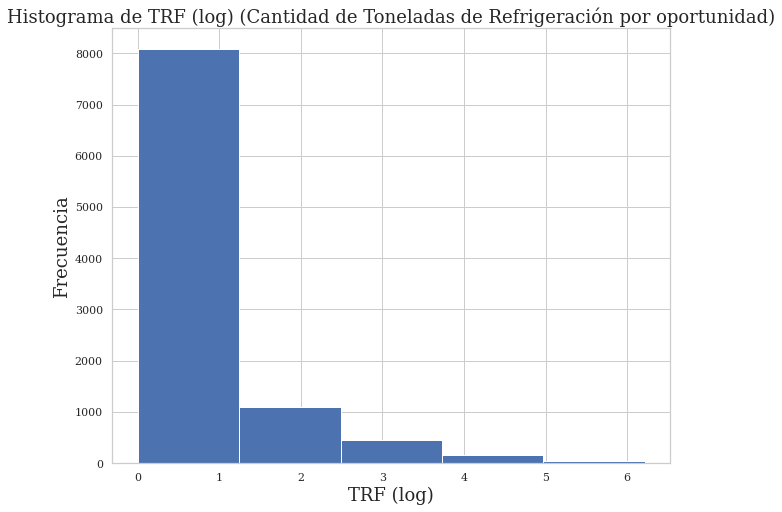

In [147]:
g= mi_df_trf.TRF_log.plot(kind='hist', bins=5,figsize=(10,8))
g.set_title("Histograma de TRF (log) (Cantidad de Toneladas de Refrigeración por oportunidad)", fontsize=18)
g.set_xlabel("TRF (log)",fontsize=18)
g.set_ylabel("Frecuencia", fontsize=18);

In [151]:
# Junto todo para graficarlo
df_final=pd.merge(mi_df,mi_df_trf,on='Opportunity_ID')
df_final = df_final.loc[(df_final['Stage']!='Proposal') & (df_final['Stage']!='Negotiation') & (df_final['Stage']!='Qualification'),:]

In [152]:
df_final['Toneladas Ref']=' '
df_final.loc[df_final['TRF']<=0.5,'Toneladas Ref']='Menor a 0,5 Toneladas de Refrigeración'
df_final.loc[(df_final['TRF']>0.5) & (df_final['TRF']<5),'Toneladas Ref']='Entre 0,5 y 5 Toneladas de Refrigeración'
df_final.loc[df_final['TRF']>=5,'Toneladas Ref']='Mayor a 5 Toneladas de Refrigeración'

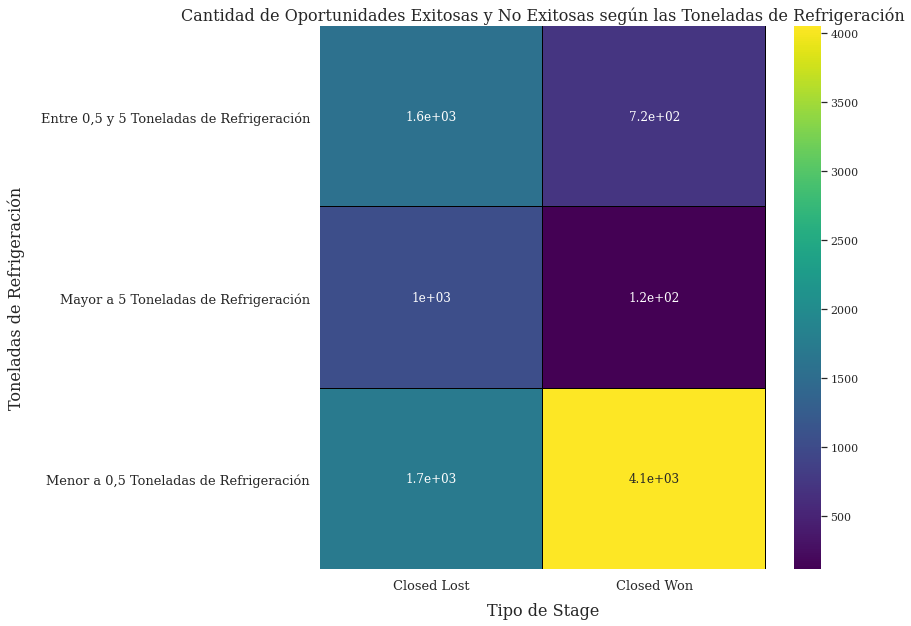

In [155]:
df_final['veces'] = 1
mi_map=pd.crosstab(df_final['Toneladas Ref'], df_final['Stage'],values=df_final.veces,aggfunc=np.sum)
fig, ax = plt.subplots(figsize=(10,10))
g = sns.heatmap(mi_map, cmap="viridis", ax=ax, linewidths=0.005, linecolor='black',annot=True)
g.set_title("Cantidad de Oportunidades Exitosas y No Exitosas según las Toneladas de Refrigeración", fontsize=16)
g.set_xlabel("Tipo de Stage", fontsize=16, labelpad=10)
g.set_ylabel("Toneladas de Refrigeración", fontsize=16, labelpad=16, rotation=90)
g.set_xticklabels(g.get_xticklabels(), fontsize=13)
g.set_yticklabels(g.get_yticklabels(), fontsize=13, rotation=0)
g.title.set_position([0.5, 1.05])
plt.show()

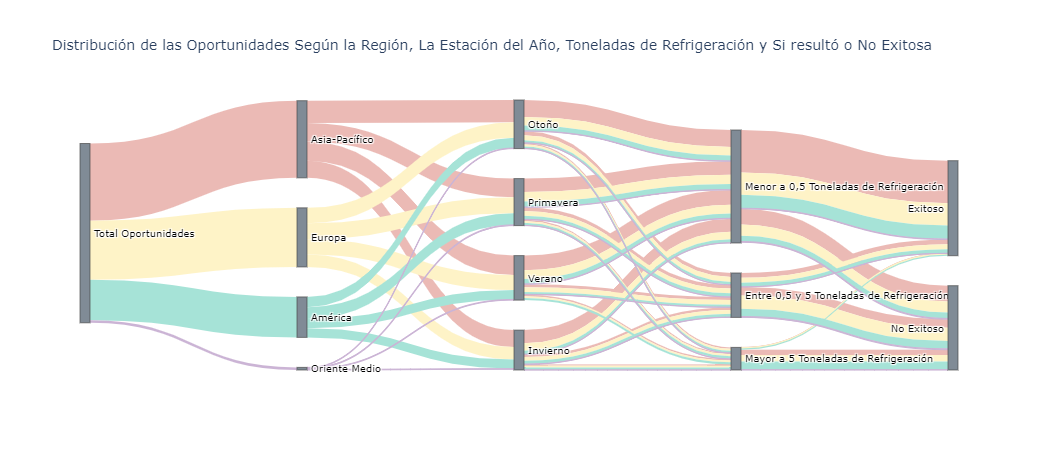

In [157]:
source = [0, 0, 0, 0,       # Total Oportunidades(va hacia 4 regiones osea a los target 1,2,3,4)
          1, 1, 1, 1,       
          2, 2, 2, 2,           
          3, 3, 3, 3,  
          4, 4, 4, 4,
          5, 5, 5,             
          6, 6, 6,
          7, 7, 7,
          8, 8, 8,
          5, 5, 5,             
          6, 6, 6,
          7, 7, 7,
          8, 8, 8,
          5, 5, 5,             
          6, 6, 6,
          7, 7, 7,
          8, 8, 8,
          5, 5, 5,             
          6, 6, 6,
          7, 7, 7,
          8, 8, 8,
          9, 9,# De acá
          10, 10, 
          11, 11,##
          9, 9,
          10, 10,
          11, 11,
          9, 9,
          10, 10, 
          11, 11,
          9, 9,
          10, 10,
          11, 11,#Hasta acá es A-P
       
         ]          

target = [1, 2, 3, 4, 
          5, 6 , 7, 8, 
          5, 6 , 7, 8,
          5, 6 , 7, 8,
          5, 6 , 7, 8,
          9, 10, 11,
          9, 10, 11, 
          9, 10, 11,
          9, 10, 11,
          9, 10, 11,
          9, 10, 11,
          9, 10, 11,
          9, 10, 11,
          9, 10, 11,
          9, 10, 11,
          9, 10, 11,
          9, 10, 11,
          9, 10, 11,
          9, 10, 11,
          9, 10, 11,
          9, 10, 11,
          12,13,# De aca 
          12,13,
          12,13,
          12,13,
          12,13,
          12,13,
          12,13,
          12,13,
          12,13,
          12,13,
          12,13,
          12,13, #Hasta aca es A-P
           ]

value = [3968, 3040, 2080, 135, # Asia-Pacífico,Europa,America,Oriente Medio
         874,1148,953, 993, # (Asia-Pacífico y Invierno),(Asia-Pacífico y Otoño),(Asia-Pacífico y Primavera),(Asia-Pacífico y Verano)
         641, 797, 823, 779, # (Europa y Invierno),(Europa y Otoño),(Europa y Primavera),(Europa y Verano)
         468, 525, 605, 482, # (America y Invierno),(America y Otoño),(America y Primavera),(America y Verano)
         33, 30, 37, 35, # (Oriente Medio y Invierno),(Oriente Medio y Otoño),(Oriente Medio y Primavera),(Asia-Pacífico y Verano)
         133, 64, 677, #(Asia-Pacífico ,Invierno) y Sus tres correspondientes TRF
         204, 74, 870, #(Asia-Pacífico ,Otoño) y Sus tres correspondientes TR
         192, 70, 691, #(Asia-Pacífico ,Primavera) y Sus tres correspondientes TR
         155, 80, 758, #(Asia-Pacífico ,Verano) y Sus tres correspondientes TR
         199, 94, 384, #(Europa,Invierno) y Sus tres correspondientes TRF
         255, 100, 442, #(Europa,Otoño) y Sus tres correspondientes TRF
         244, 97, 482, #(Europa,Primavera) y Sus tres correspondientes TRF
         241, 88, 450,#(Europa,Verano) y Sus tres correspondientes TRF
         167, 122, 179, #(America,Invierno) y Sus tres correspondientes TRF
         139, 109, 277, #(America,Otoño) y Sus tres correspondientes TRF
         184, 134, 287, #(America,Primavera) y Sus tres correspondientes TRF
         122, 113, 247,#(America,Verano) y Sus tres correspondientes TRF
         15, 8, 10, #(Oriente Medio,Invierno) y Sus tres correspondientes TRF
         8, 2, 20, #(Oriente Medio,Otoño) y Sus tres correspondientes TRF
         12, 8, 17,#(Oriente Medio,Primavera) y Sus tres correspondientes TRF
         14, 0, 21,#(Oriente Medio,Verano) y Sus tres correspondientes TRF
         438, 246, ############ De acá Asia-Pacífico
         274, 14,      
         811,2185,
         684, 255,
         334, 45,
         572, 1150,
         403, 209,
         419, 59,
         298, 692,
         45, 4,
         18, 0,
         40, 28,
        ]

label = ['Total Oportunidades',
         'Asia-Pacífico',
         'Europa', 
         'América',
         'Oriente Medio',
         'Invierno', 
         'Otoño', 
         'Primavera', 
         'Verano',
         'Entre 0,5 y 5 Toneladas de Refrigeración',
         'Mayor a 5 Toneladas de Refrigeración',
         'Menor a 0,5 Toneladas de Refrigeración',
         'No Exitoso',
         'Exitoso',
         ]

color_node = [
'#808B96', 
'#808B96', '#808B96', '#808B96', '#808B96',
'#808B96', '#808B96', '#808B96', '#808B96',
'#808B96','#808B96','#808B96',
'#808B96','#808B96']
color_link = [
'#EBBAB5', '#FEF3C7', '#A6E3D7', '#CBB4D5', #Rojo, #Amarillo, #Verde, #Lila
'#EBBAB5', '#EBBAB5', '#EBBAB5', '#EBBAB5',  
'#FEF3C7', '#FEF3C7', '#FEF3C7', '#FEF3C7', 
'#A6E3D7', '#A6E3D7', '#A6E3D7', '#A6E3D7', 
'#CBB4D5', '#CBB4D5', '#CBB4D5', '#CBB4D5',
'#EBBAB5', '#EBBAB5', '#EBBAB5',
'#EBBAB5', '#EBBAB5', '#EBBAB5',
'#EBBAB5', '#EBBAB5', '#EBBAB5',
'#EBBAB5', '#EBBAB5', '#EBBAB5',
'#FEF3C7', '#FEF3C7','#FEF3C7',
'#FEF3C7', '#FEF3C7','#FEF3C7',
'#FEF3C7', '#FEF3C7','#FEF3C7',
'#FEF3C7', '#FEF3C7','#FEF3C7',
'#A6E3D7', '#A6E3D7','#A6E3D7',
'#A6E3D7', '#A6E3D7','#A6E3D7',
'#A6E3D7', '#A6E3D7','#A6E3D7',
'#A6E3D7', '#A6E3D7','#A6E3D7',
'#CBB4D5', '#CBB4D5', '#CBB4D5',
'#CBB4D5', '#CBB4D5', '#CBB4D5',
'#CBB4D5', '#CBB4D5', '#CBB4D5',
'#CBB4D5', '#CBB4D5', '#CBB4D5',
'#EBBAB5','#EBBAB5','#EBBAB5','#EBBAB5','#EBBAB5','#EBBAB5',
'#FEF3C7','#FEF3C7','#FEF3C7','#FEF3C7','#FEF3C7','#FEF3C7',
'#A6E3D7','#A6E3D7','#A6E3D7','#A6E3D7','#A6E3D7','#A6E3D7',
'#CBB4D5','#CBB4D5','#CBB4D5','#CBB4D5','#CBB4D5','#CBB4D5',
]

# data to dict, dict to sankey
link = dict(source = source, target = target, value = value, color = color_link)
node = dict(label = label, pad=30, thickness=10, color = color_node)
data = go.Sankey(link = link, node=node)
# plot
fig = go.Figure(data)
fig.update_layout(title_text="Distribución de las Oportunidades Según la Región, La Estación del Año, Toneladas de Refrigeración y Si resultó o No Exitosa ", font_size=10)
fig.show()

## Vendedores Responsables de la Oportunidad

In [84]:
df_ven=df_op[['Opportunity_Owner','Stage']].copy()
df_ven['veces'] = 1
#df_ven = df_ven.loc[df_ven['Territory']!='None',:]

In [85]:
ven_oprtunidades = pd.pivot_table(df_ven, values='veces', index=['Opportunity_Owner'],columns=['Stage'], aggfunc=np.sum, fill_value=0).reset_index()
ven_oprtunidades=ven_oprtunidades.fillna(0)
ven_oprtunidades['Total_Oportunidades'] = ven_oprtunidades['Closed Lost']+ ven_oprtunidades['Closed Won']
ven_oprtunidades['Ratio_Oportunidades_exitosas'] = ven_oprtunidades['Closed Won']/ven_oprtunidades['Total_Oportunidades']
ven_oprtunidades.head()

Stage Opportunity_Owner  Closed Lost  Closed Won  Total_Oportunidades  \
0         Person_Name_0            1           0                    1   
1        Person_Name_10            2           0                    2   
2        Person_Name_11           45          26                   71   
3        Person_Name_12           16           4                   20   
4        Person_Name_13          322         434                  756   

Stage  Ratio_Oportunidades_exitosas  
0                          0.000000  
1                          0.000000  
2                          0.366197  
3                          0.200000  
4                          0.574074

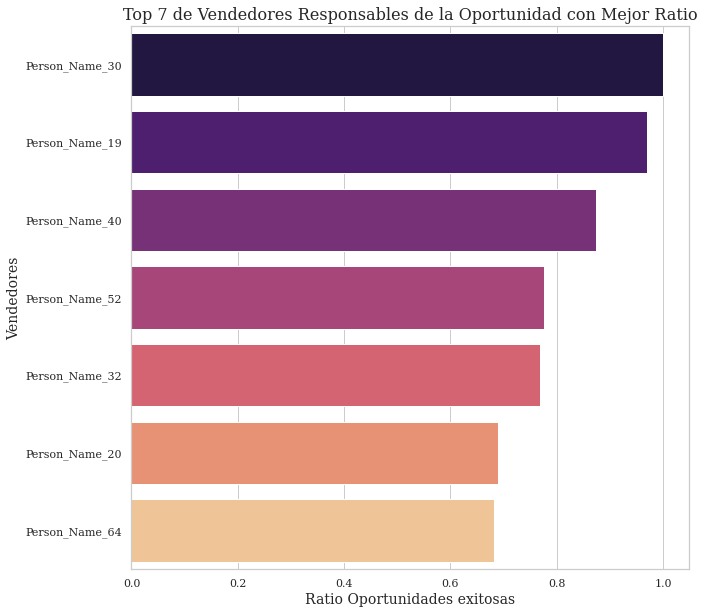

In [86]:
target = ven_oprtunidades.nlargest(7,'Ratio_Oportunidades_exitosas')
plt.subplots(figsize=(10,10))
grafico_top=sns.barplot(x=target.Ratio_Oportunidades_exitosas,y=target.Opportunity_Owner,palette="magma")
grafico_top.set_title("Top 7 de Vendedores Responsables de la Oportunidad con Mejor Ratio",fontsize=16)
grafico_top.set_xlabel("Ratio Oportunidades exitosas",fontsize=14)
grafico_top.set_ylabel("Vendedores",fontsize=14);

In [88]:
ven_oprtunidades.Total_Oportunidades.sum()*0.01

97.91

In [89]:
ven_oprtunidades=ven_oprtunidades.loc[ven_oprtunidades['Total_Oportunidades']>98]

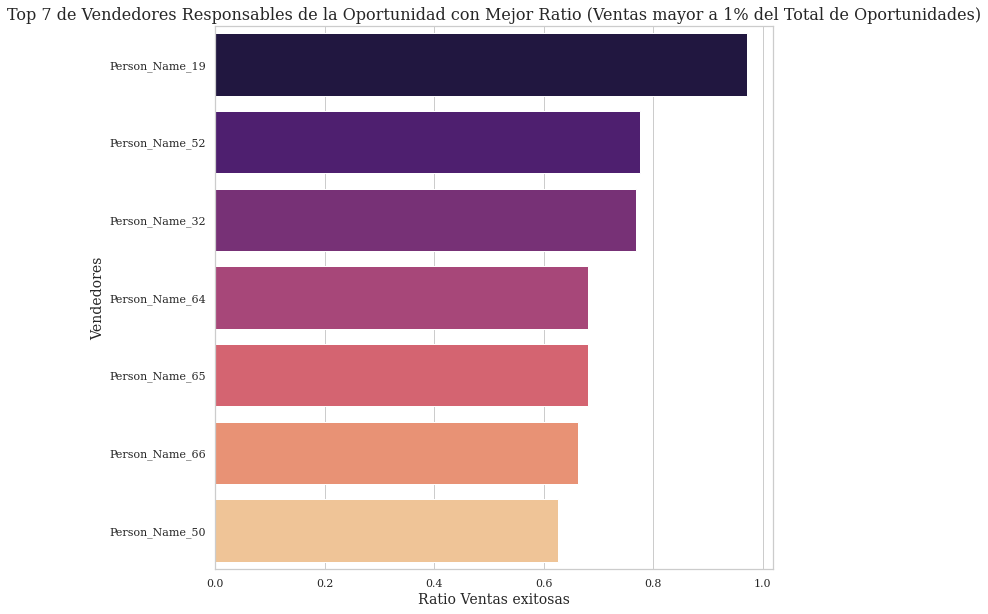

In [105]:
target = ven_oprtunidades.nlargest(7,'Ratio_Oportunidades_exitosas')
plt.subplots(figsize=(10,10))
grafico_top=sns.barplot(x=target.Ratio_Oportunidades_exitosas,y=target.Opportunity_Owner,palette="magma")
grafico_top.set_title("Top 7 de Vendedores Responsables de la Oportunidad con Mejor Ratio (Ventas mayor a 1% del Total de Oportunidades)",fontsize=16)
grafico_top.set_xlabel("Ratio Ventas exitosas",fontsize=14)
grafico_top.set_ylabel("Vendedores",fontsize=14);

## Nombre del Prodcuto

In [109]:
df_p=df[['Product_Name','Stage']].copy()
df_p['veces'] = 1
df_p = df_p.loc[df_p['Product_Name']!='None',:]

In [116]:
prod = pd.pivot_table(df_p, values='veces', index=['Product_Name'],columns=['Stage'], aggfunc=np.sum, fill_value=0).reset_index()
prod=prod.fillna(0)
prod['Total_Oportunidades'] = prod['Closed Lost']+ prod['Closed Won']
prod['Ratio_Oportunidades_exitosas'] = prod['Closed Won']/prod['Total_Oportunidades']
prod.head()

Stage      Product_Name  Closed Lost  Closed Won  Negotiation  Proposal  \
0        Product_Name_0           69          96            0         0   
1        Product_Name_1            4           9            0         0   
2       Product_Name_10           40          76            0         0   
3      Product_Name_100          401         575            0         0   
4      Product_Name_101            1           3            0         0   

Stage  Qualification  Total_Oportunidades  Ratio_Oportunidades_exitosas  
0                  0                  165                      0.581818  
1                  0                   13                      0.692308  
2                  0                  116                      0.655172  
3                  0                  976                      0.589139  
4                  0                    4                      0.750000

In [118]:
prod=prod.loc[prod['Total_Oportunidades']>100]

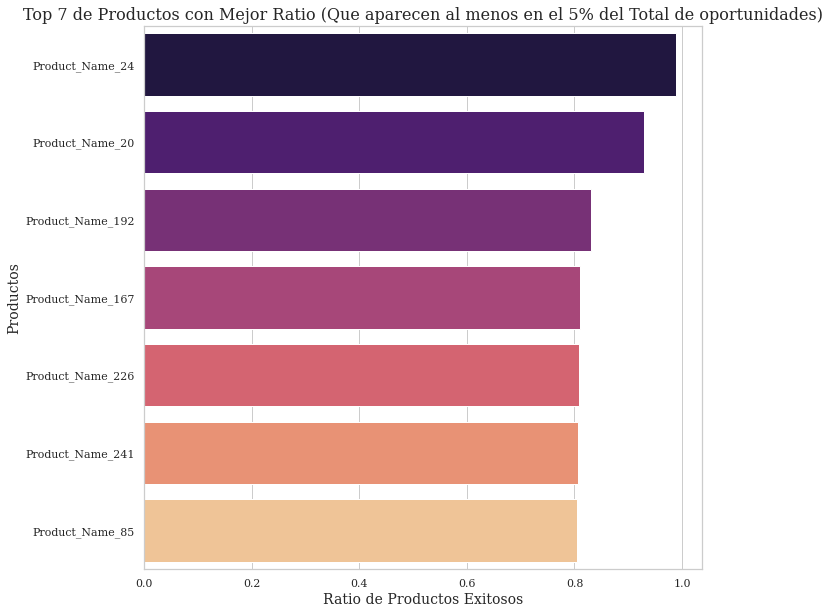

In [119]:
target = prod.nlargest(7,'Ratio_Oportunidades_exitosas')
plt.subplots(figsize=(10,10))
grafico_top=sns.barplot(x=target.Ratio_Oportunidades_exitosas,y=target.Product_Name,palette="magma")
grafico_top.set_title("Top 7 de Productos con Mejor Ratio (Que aparecen al menos 100 veces en el Total de oportunidades)",fontsize=16)
grafico_top.set_xlabel("Ratio de Productos Exitosos",fontsize=14)
grafico_top.set_ylabel("Productos",fontsize=14);

### Datos Temporales